# World Happiness Report #

### Group Number #8

Group Members: Kfir.D, Lihi.N, Gal.P & Mika.R

## About:

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
happy_df = pd.read_csv('World Happiness Report.csv')

import sklearn as sk
from sklearn.linear_model import LinearRegression

import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
from PIL import Image
from io import BytesIO

In [2]:
happy_df.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.72359,7.350416,0.450662,50.5,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072


# Heatmap

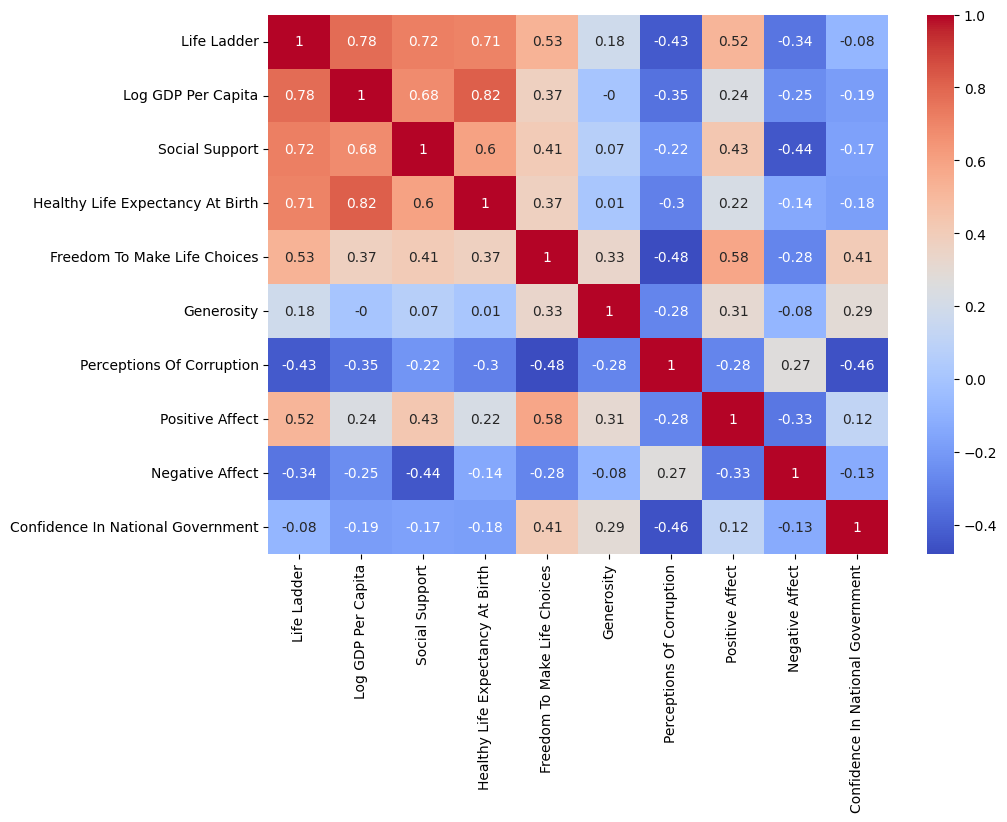

In [3]:
my_cols = ['Life Ladder', 
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government']
plt.figure(figsize=(10,7))
my_cor = happy_df[my_cols].corr().round(2)
sns.heatmap(data=my_cor, cmap='coolwarm', annot=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

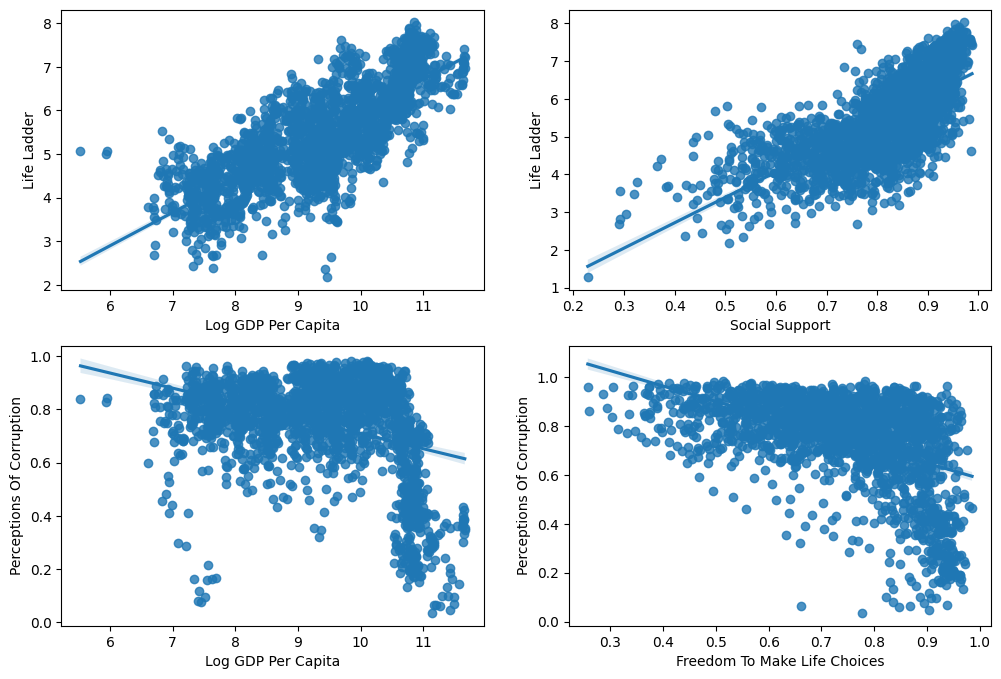

In [48]:
fig, ax = plt.subplots(2,2, figsize = (12,8))
sns.regplot(data=happy_df, x='Log GDP Per Capita', y='Life Ladder', ax=ax[0,0])
sns.regplot(data=happy_df, x='Social Support', y='Life Ladder', ax=ax[0,1])
sns.regplot(data=happy_df, x='Log GDP Per Capita', y='Perceptions Of Corruption', ax=ax[1,0])
sns.regplot(data=happy_df, x='Freedom To Make Life Choices', y='Perceptions Of Corruption', ax=ax[1,1])

plt.show

# Neighborhood

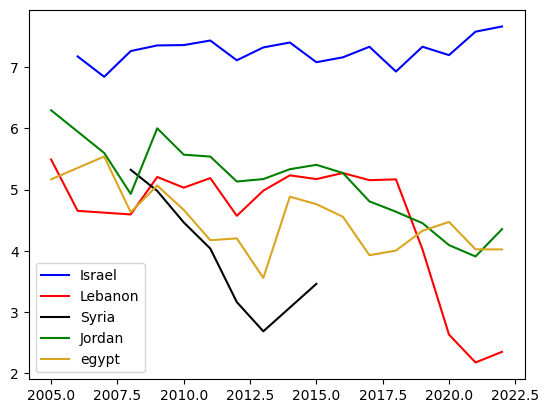

In [5]:
israel_df = happy_df[happy_df['Country Name']=='Israel']
lebanon_df = happy_df[happy_df['Country Name']=='Lebanon']
syria_df = happy_df[happy_df['Country Name']=='Syria']
jordan_df = happy_df[happy_df['Country Name']=='Jordan']
egypt_df = happy_df[happy_df['Country Name']=='Egypt']

plt.plot(israel_df['Year'], israel_df['Life Ladder'], label='Israel', color='blue')
plt.plot(lebanon_df['Year'], lebanon_df['Life Ladder'], label='Lebanon', color='red')
plt.plot(syria_df['Year'], syria_df['Life Ladder'], label='Syria', color='black')
plt.plot(jordan_df['Year'], jordan_df['Life Ladder'], label='Jordan', color='green')
plt.plot(egypt_df['Year'], egypt_df['Life Ladder'], label='egypt', color='goldenrod')

plt.legend()
plt.show()

# Top 10 

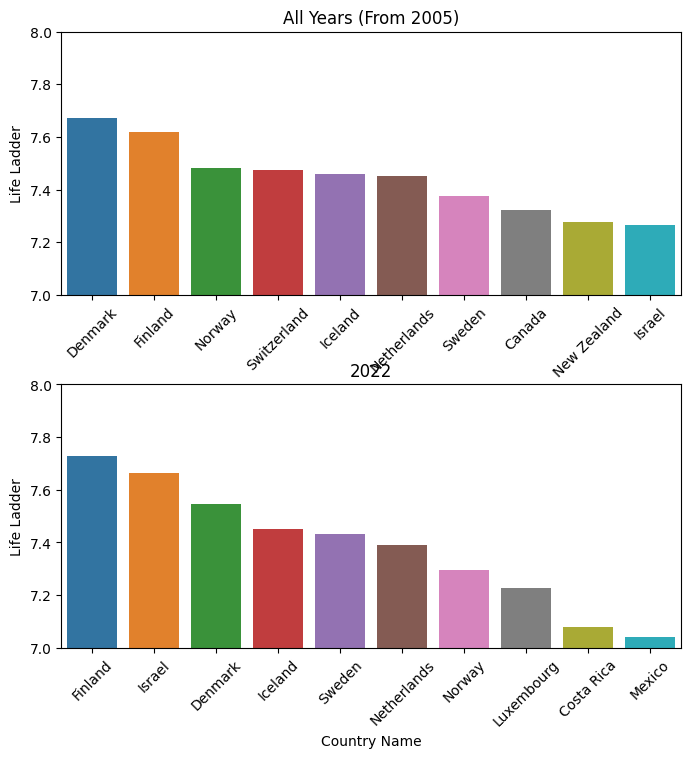

In [17]:
av_df = happy_df.groupby('Country Name')[['Life Ladder']].mean().sort_values('Life Ladder', ascending=False).reset_index()
df_2022 = happy_df[happy_df.Year==2022].sort_values('Life Ladder', ascending=False).reset_index()

fig, ax = plt.subplots(2,1, figsize = (8,8))
plt.subplots_adjust(hspace = 0.34)

sns.barplot(data=av_df.head(10), x='Country Name', y='Life Ladder', ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_ylim(7,8)
ax[0].set_title('All Years (From 2005)')
sns.barplot(data=df_2022.head(10), x='Country Name', y='Life Ladder', ax = ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylim(7,8)
ax[1].set_title('2022')
plt.show()


# Happinness Prediction

In [49]:
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [58]:
features = ['Year', 'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government']
happy2 = happy_df.dropna()
X = happy2[features]
y = happy2['Life Ladder']

In [59]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.1, random_state=1) 
reg_model = LinearRegression()
reg_model.fit(X, y)
prediction = reg_model.predict(X_test)
sk.metrics.accuracy_score(prediction.round(0), y_test.round(0))

0.650887573964497

In [54]:
feature_importances = pd.DataFrame(reg_model.coef_,
                                   index = features,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances

,importance
Positive Affect,2.023502
Social Support,1.694881
Freedom To Make Life Choices,0.846875
Generosity,0.483262
Log GDP Per Capita,0.360883
Negative Affect,0.271940
Healthy Life Expectancy At Birth,0.026722
Year,-0.011694
Confidence In National Government,-0.655412
Perceptions Of Corruption,-1.129320


In [52]:
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
from PIL import Image
from io import BytesIO

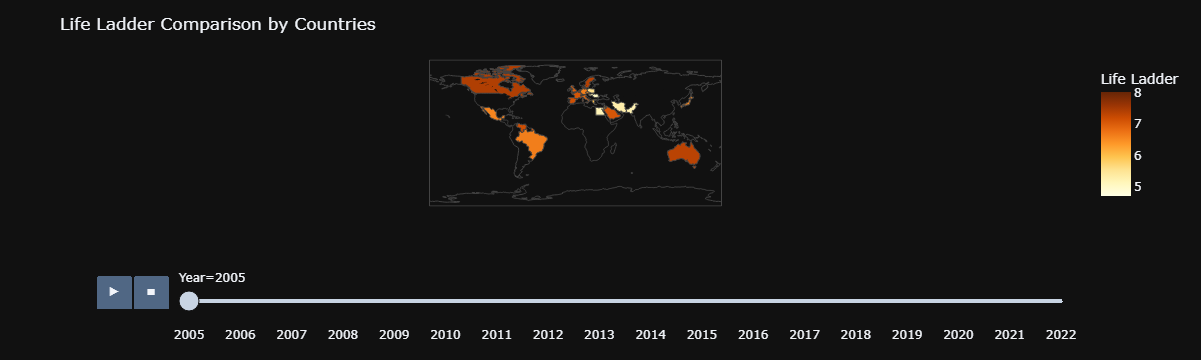

In [53]:
fig = px.choropleth(happy_df.sort_values("Year"), 
                    locations = "Country Name",
                    color = "Life Ladder",
                    locationmode = "country names",
                    template = "plotly_dark",
                     color_continuous_scale= 'YlOrBr',
                    animation_frame = "Year")
fig.update_layout(title = "Life Ladder Comparison by Countries")
fig.show()